In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [60]:
df = pd.read_csv('Corona_NLP_test.csv')
dir_name = "../rawdata"
if os.path.isdir(dir_name)==False:
    os.mkdir("../rawdata")
filename = "raw_csv.csv"
full_name = os.path.join(dir_name , filename)
df.to_csv(full_name, sep=',')
readme_file_name = os.path.join(dir_name,'readme.txt')
with open(readme_file_name, "a") as f:
    f.write('Create a new text!\n')
f.close()

In [61]:
raw_data = df['OriginalTweet']
raw_data.to_csv('../rawdata/raw_csv.csv', index=False)

In [62]:
dir_name = "../cleandata"
if os.path.isdir(dir_name)==False:
    os.mkdir("../cleandata")
filename = "clean_data.csv"
full_name = os.path.join(dir_name , filename)
df.to_csv(full_name, sep=',')
f.close()

In [67]:
dir_name = "../result"
if os.path.isdir(dir_name)==False:
    os.mkdir("../result")
full_name = os.path.join(dir_name)
f.close()

In [63]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [64]:
clean_data = raw_data.apply(preprocess_text)
clean_data.to_csv('clean_data.csv', index=False)

In [65]:
word_freq = {}
for tweet in clean_data:
    tweet_str = ' '.join(tweet) # join the list elements into a string
    for token in tweet_str.split():
        if token in word_freq:
            word_freq[token] += 1
        else:
            word_freq[token] = 1

In [66]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

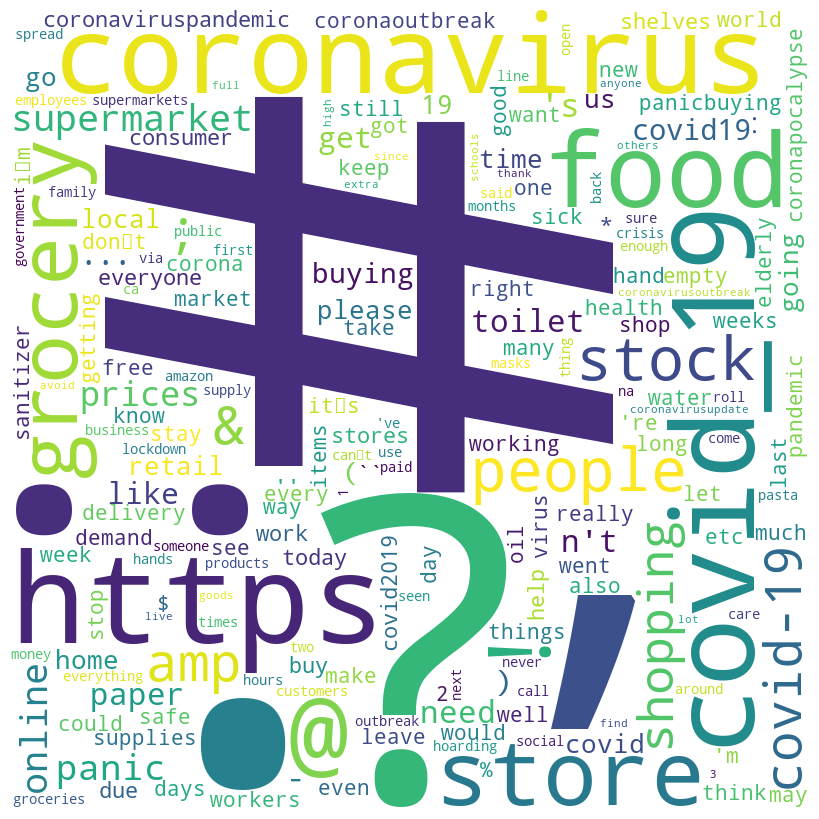

In [69]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("../result/nlpres.png")
plt.show()
